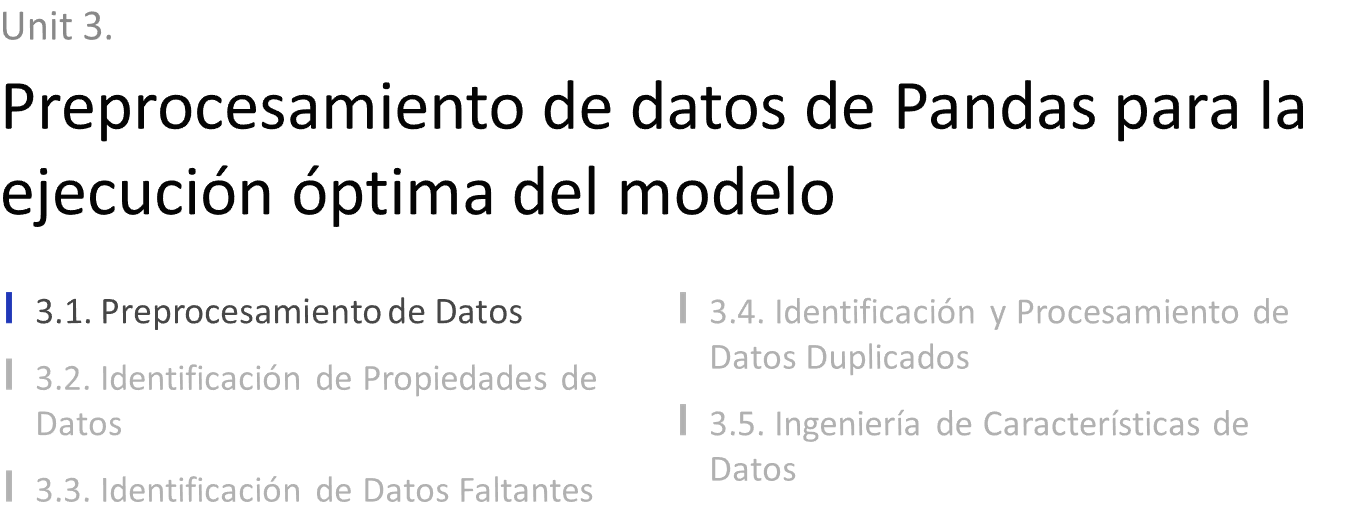

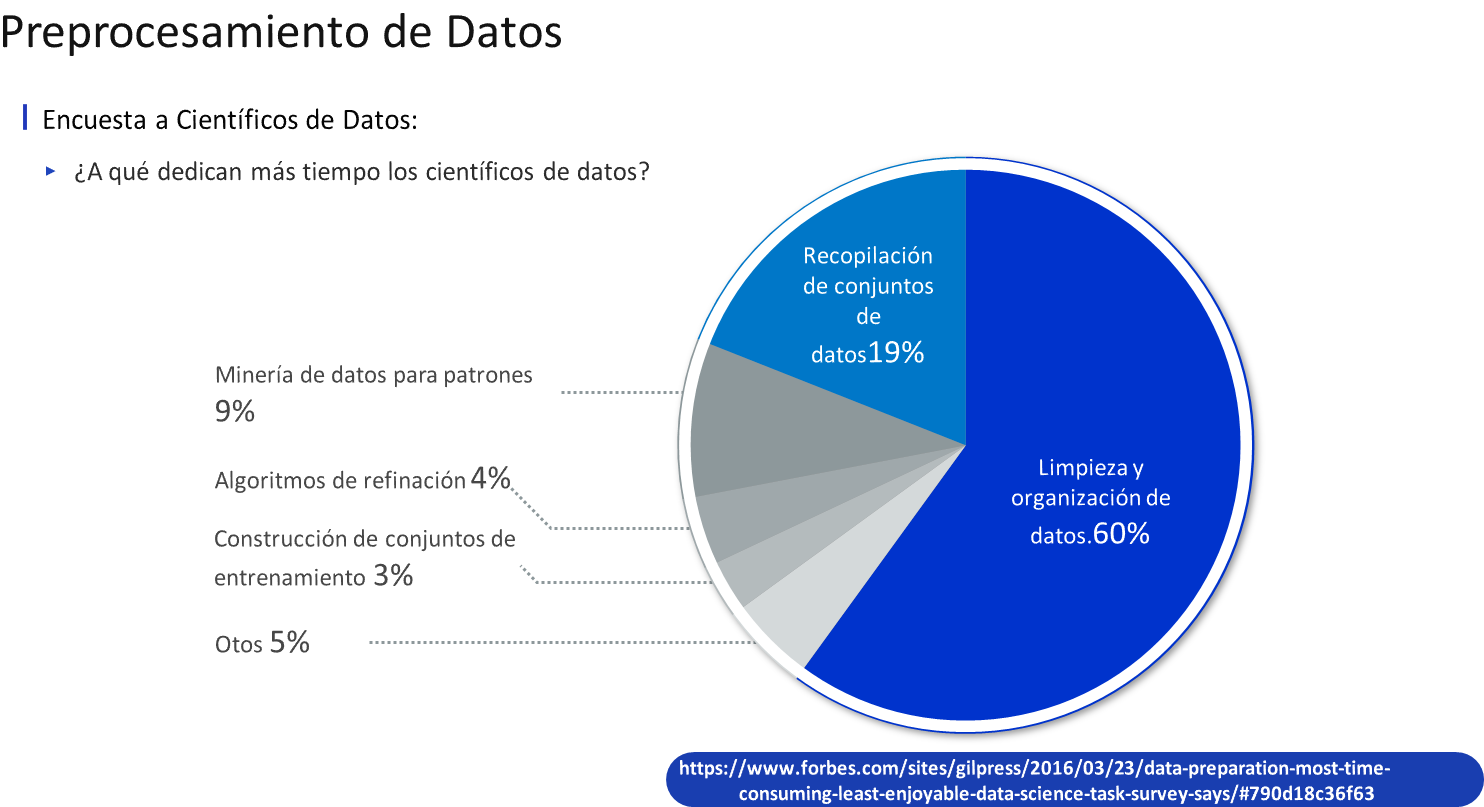

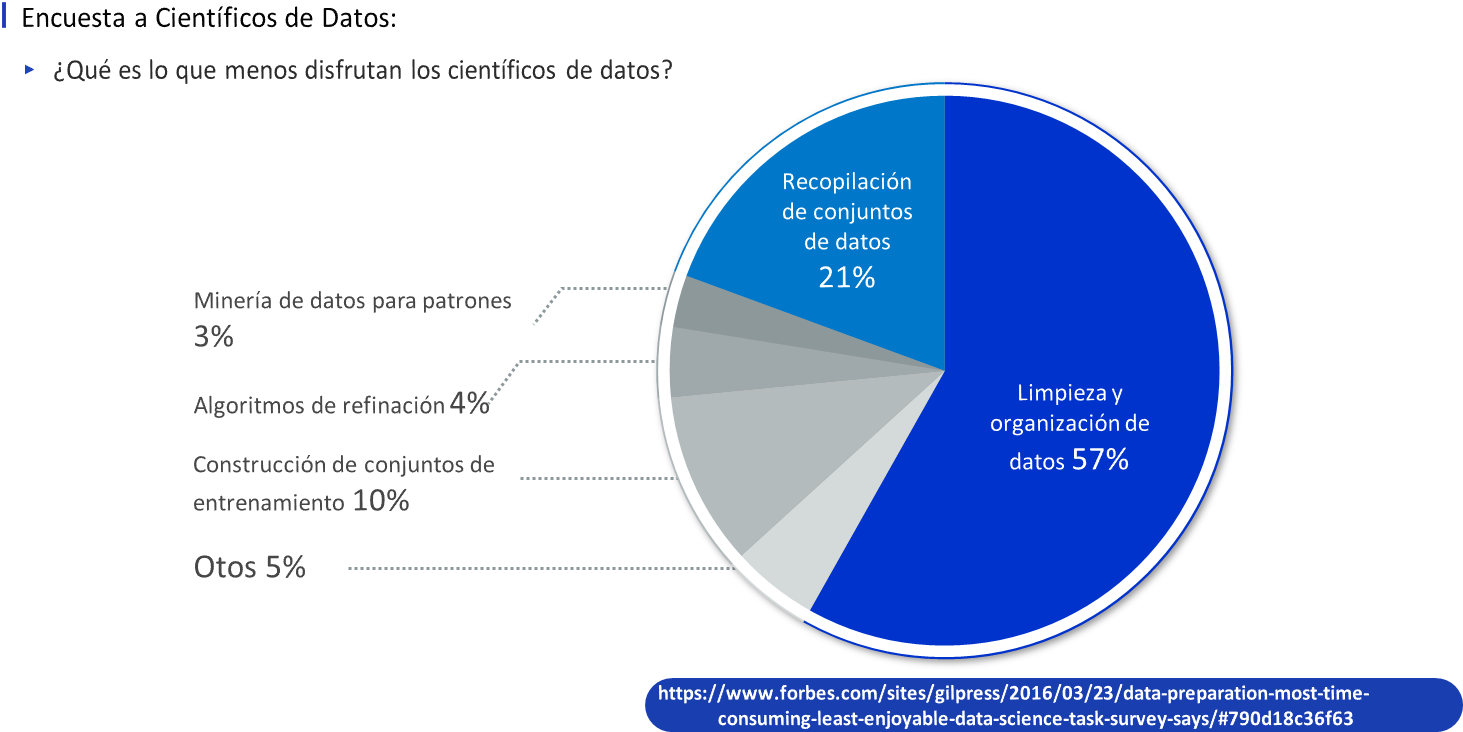

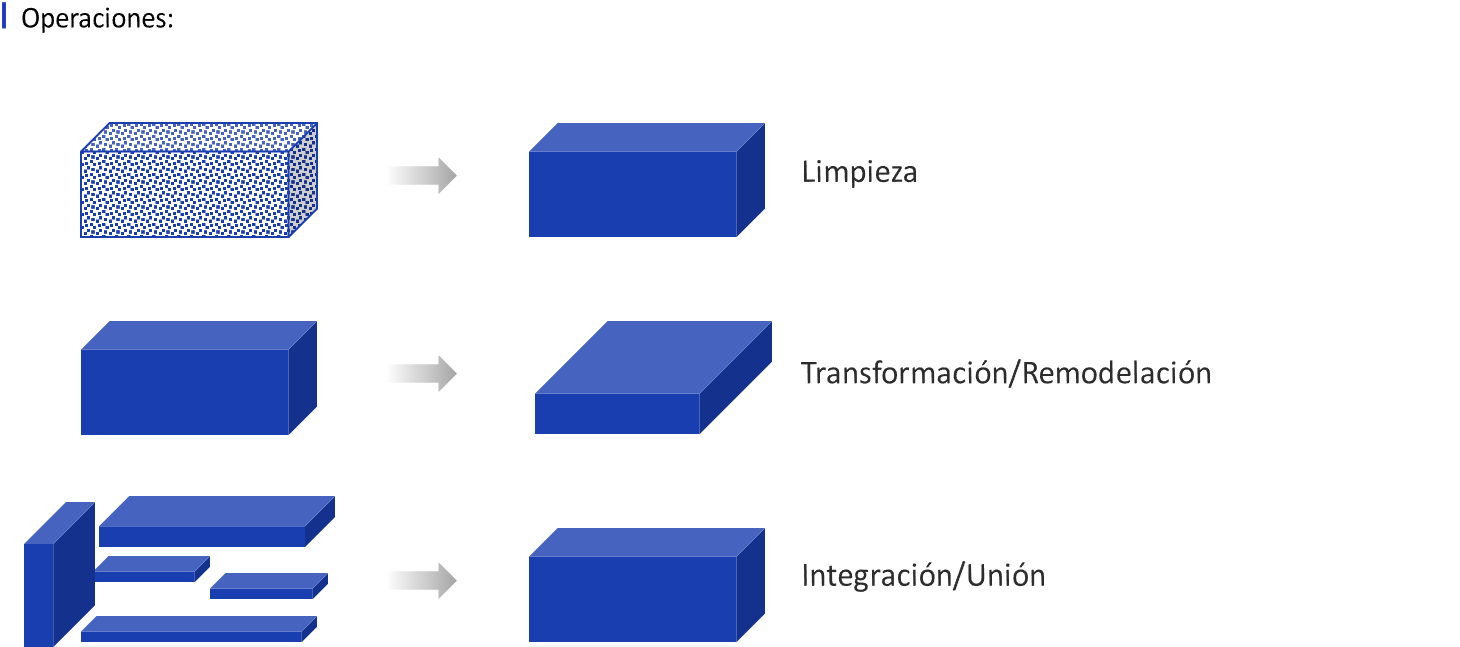

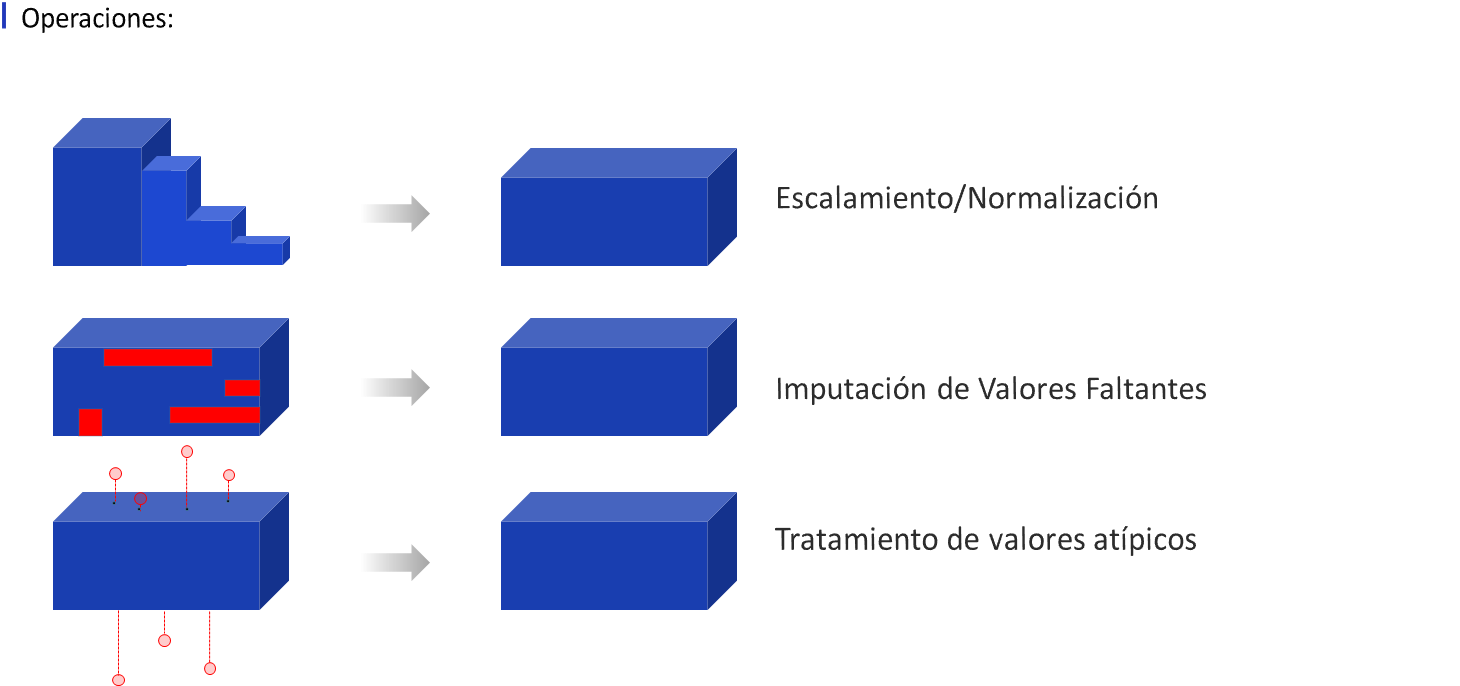

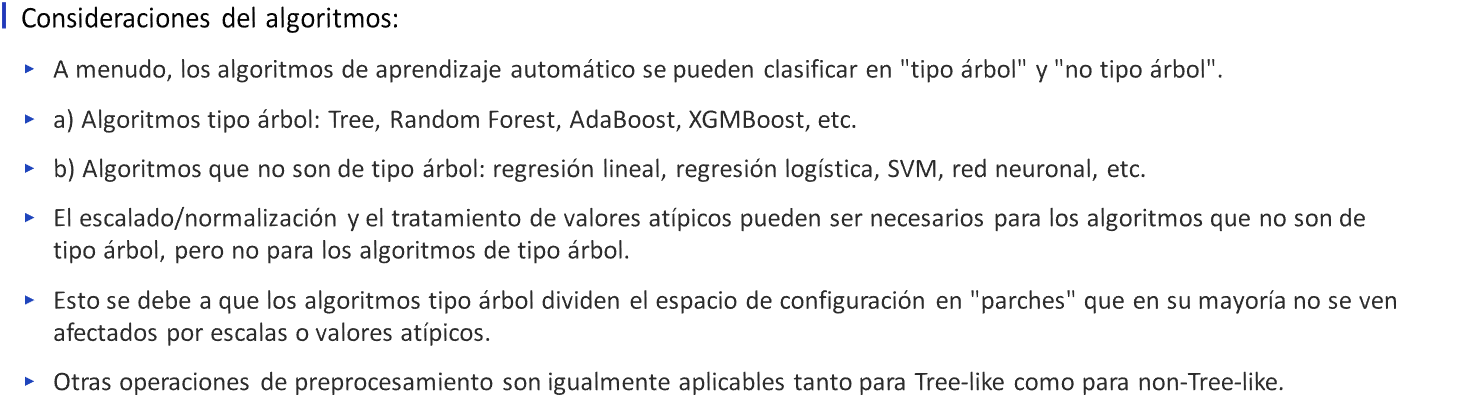

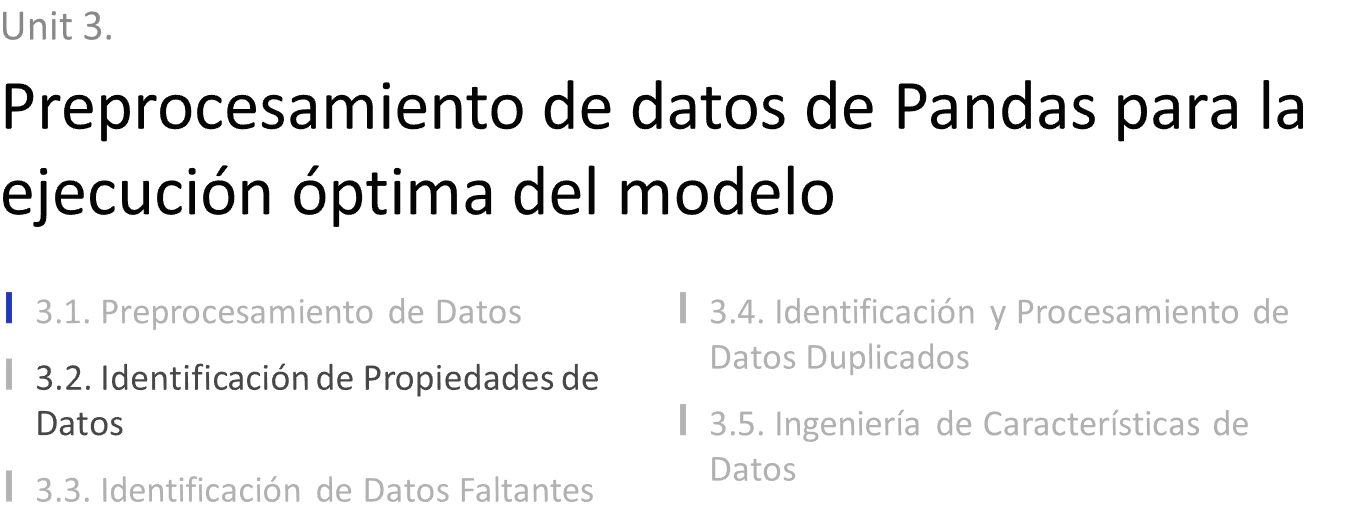

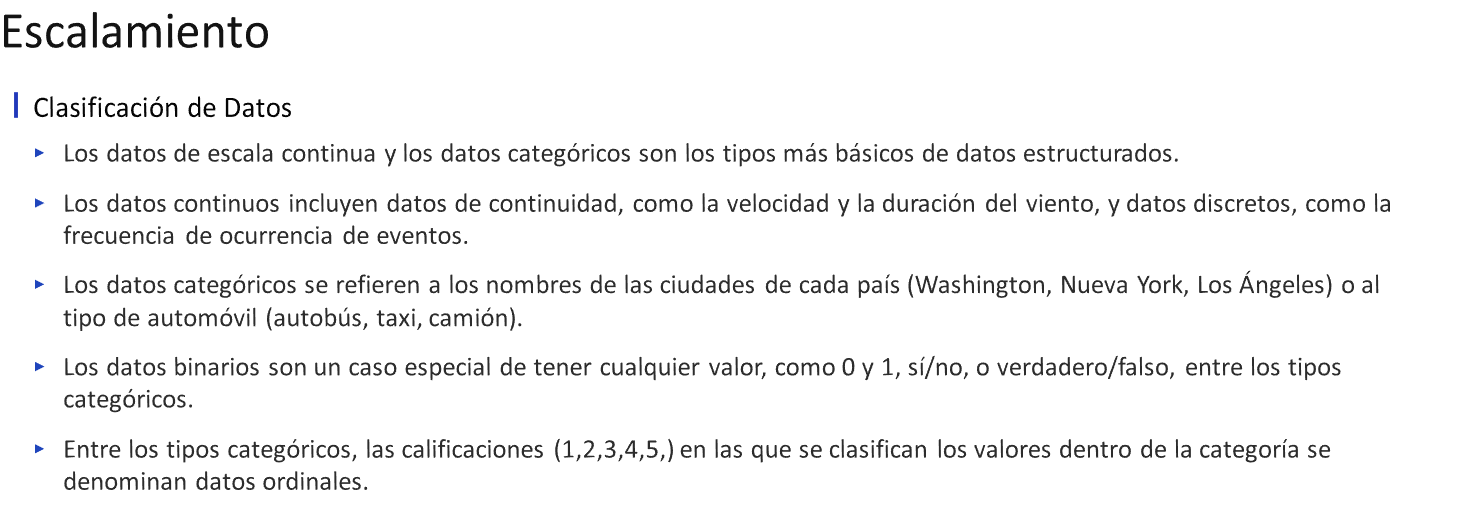

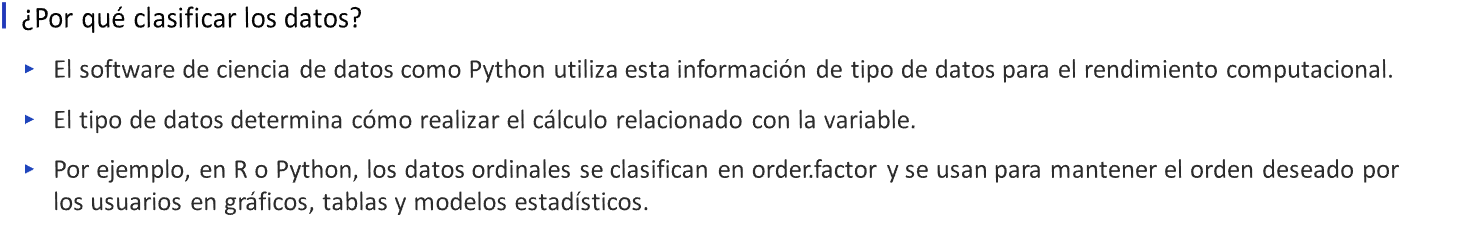

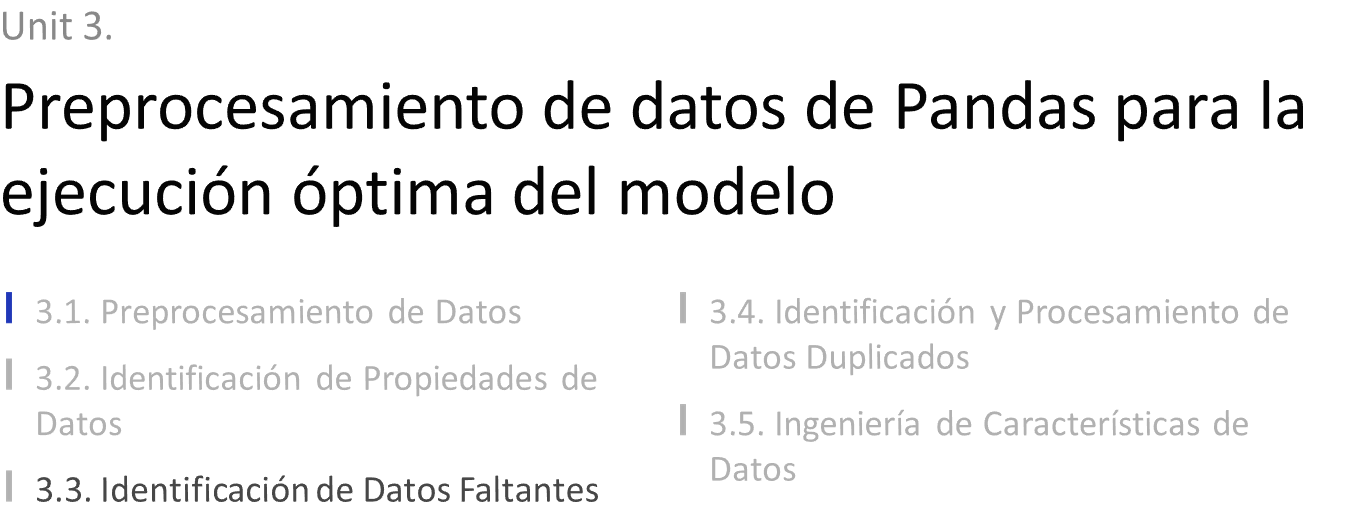

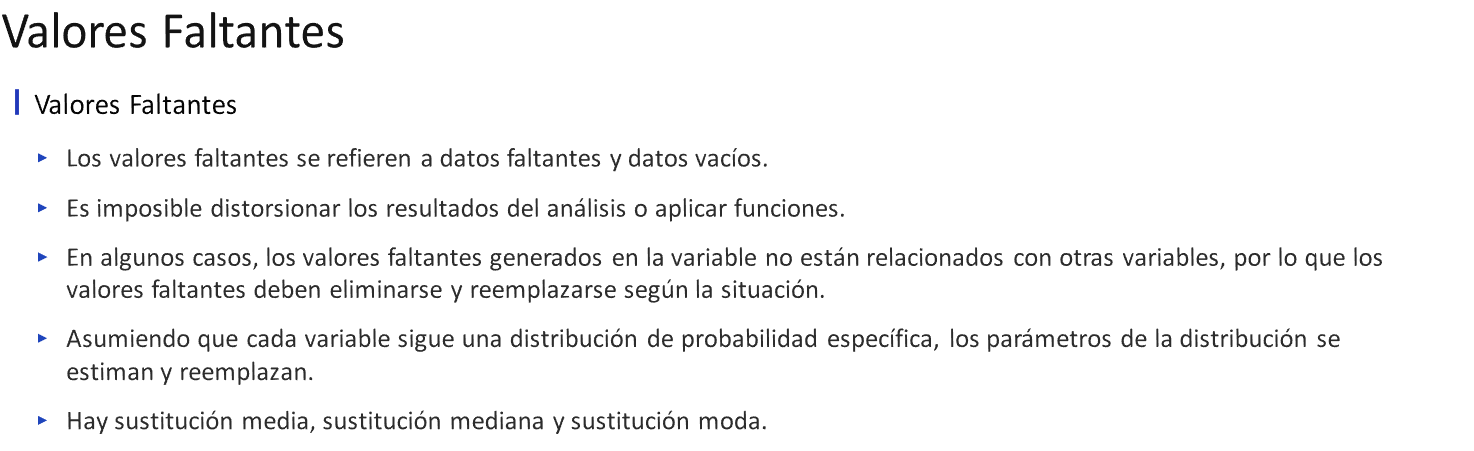

#### Verificación de datos faltantes

In [1]:
import seaborn as sns # Importación Libreria
df = sns.load_dataset('titanic')  # Importación dataset
nan_deck = df['deck'].value_counts(dropna=False)
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


#### Verificación de Datos Faltantes

In [4]:
print(df.head().isnull()) #Encuentre los datos faltantes usando el método isnull

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


#### Verificación de Datos Faltantes

In [3]:
print(df.head().notnull()) #Encuentre los datos faltantes usando el método notnull

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


#### Verificación de Datos Faltantes

In [5]:
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


#### Aplicar la opción Threshold=500 al método dropna() elimina todas las colimnas con 500 o más valores de NaN

In [6]:
df_thresh = df.dropna(axis=1, thresh=500) #Elimine todas las columnas con más de 500 valores NaN
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


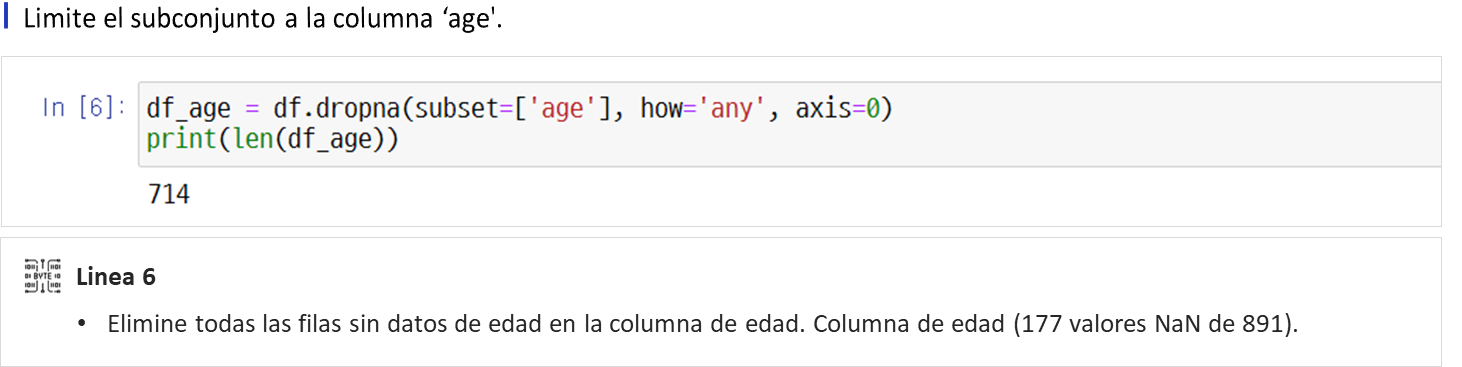

#### Limite el subconjunto a la columna 'age',

In [7]:
df_age = df.dropna(subset=['age'], how='any', axis=0) # Elimine todas las filas sin datos de edad en la columna edad
print(len(df_age))

714


## Reemplazando Valores Faltantes

#### Reemplazar valores faltantes con la media

In [8]:
mean_age = df['age'].mean(axis=0)
df['age'].fillna(mean_age, inplace=True)
print(df['age'].head(10))

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


## Práctica con Datos Faltantes

#### Comprobación de Datos Faltantes

In [20]:
df = sns.load_dataset('titanic') # cargue el conjunto de datos titanic
print(df['embark_town'][825:830]) # Imprima los datos de NaN de la columna Embard Town y la fila 829
print('\n')

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object




#### Reemplazar Valores Faltantes con la moda

In [21]:
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq) #El valor de Nan de la columna de la ciudad con la moda
print('\n')

Southampton




In [23]:
df['embark_town'].fillna(most_freq, inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


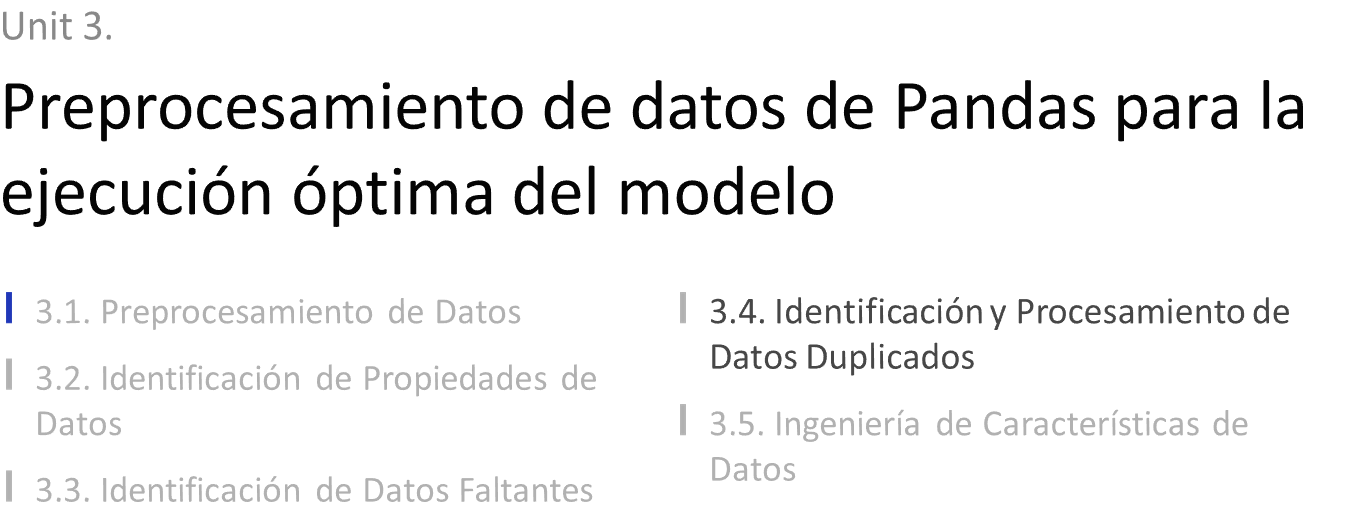

## Procesamiento de Datos Duplicados

#### Comprobar si hay datos duplicados

In [24]:
# Cree un dataframe con datos duplicados
import pandas as pd
df = pd.DataFrame({'c1': ['a', 'a', 'b', 'a', 'b'],
                  'c2':[1,1,1,2,2],
                  'c3': [1,1,2,2,2]})

#### Comprobar si hay datos duplicados

In [25]:
df_dup = df.duplicated()
print(df_dup)

0    False
1     True
2    False
3    False
4    False
dtype: bool


#### Los datos de la línea 1 se vuelven verdaderos porque se superponen con la fila 0 anterior

In [26]:
col_dup = df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [28]:
### Método drop_duplicates()
df2 = df.drop_duplicates()
print(df2)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [30]:
### Referencia de columna correspondiente a la opción de subconjunto
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


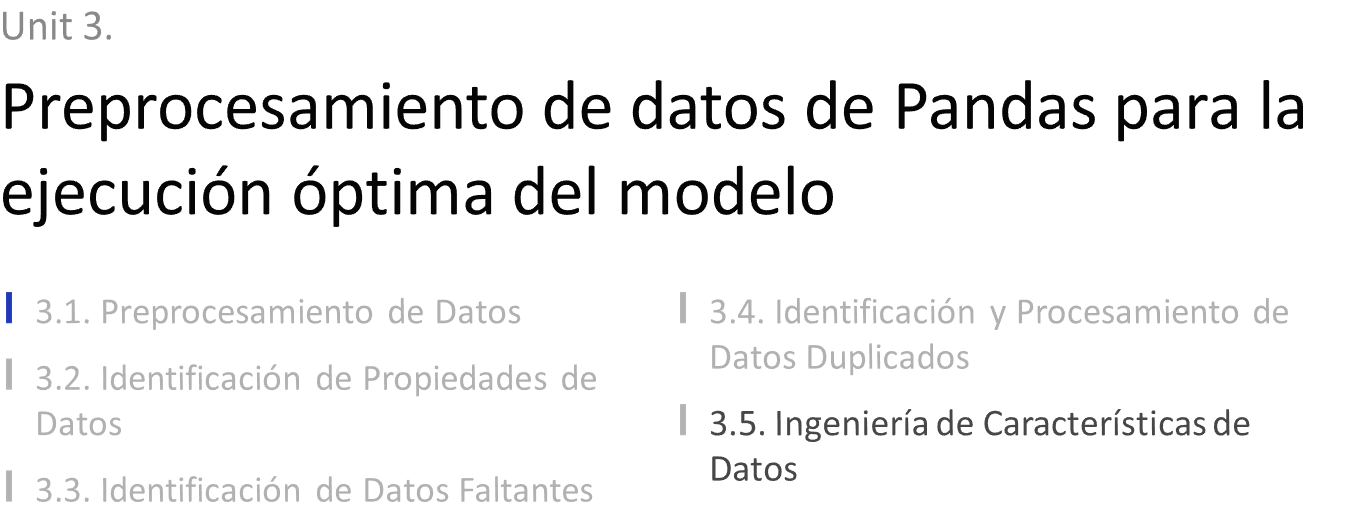

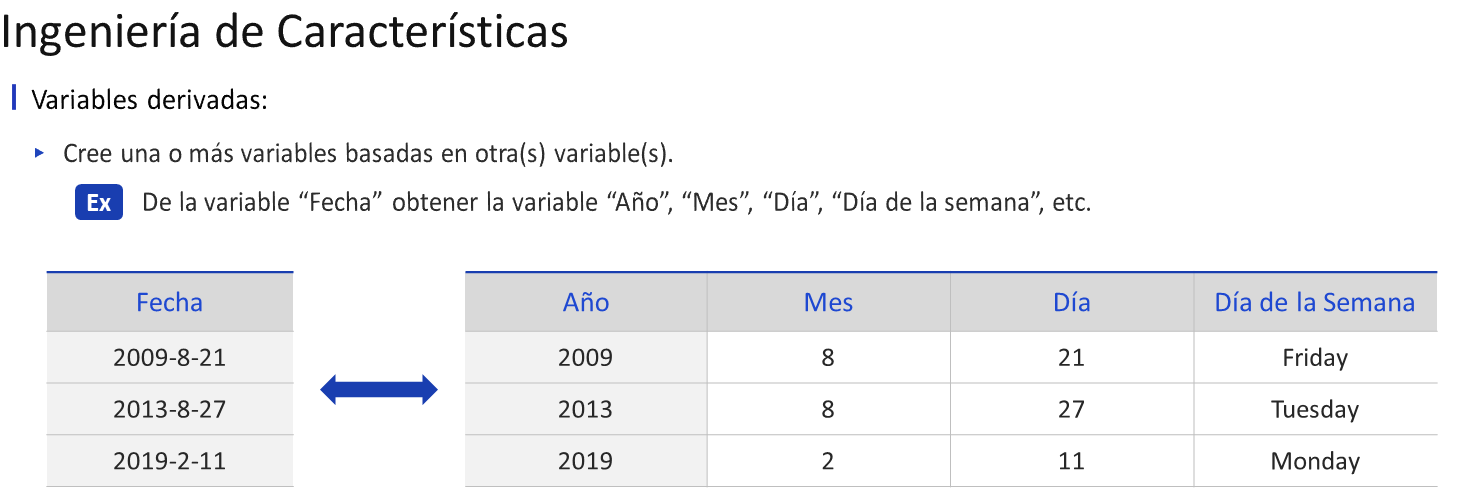

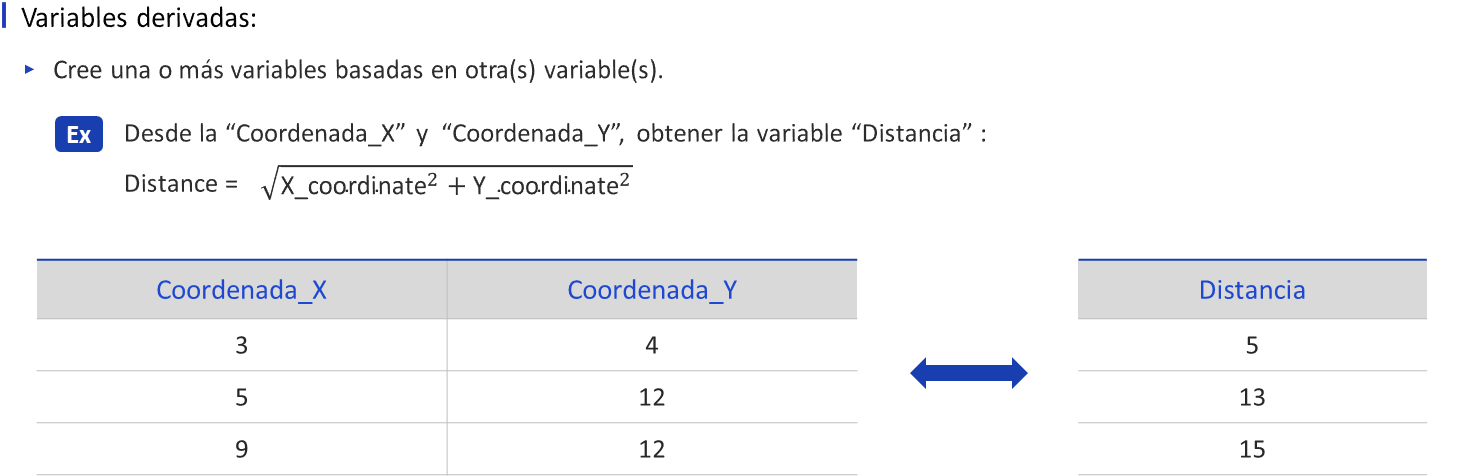

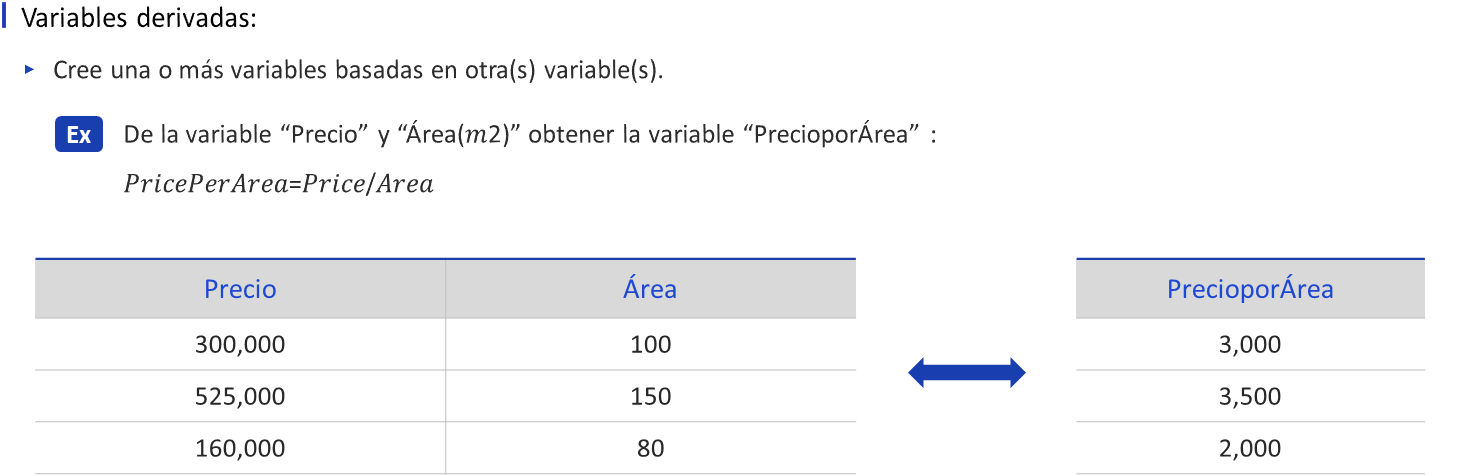

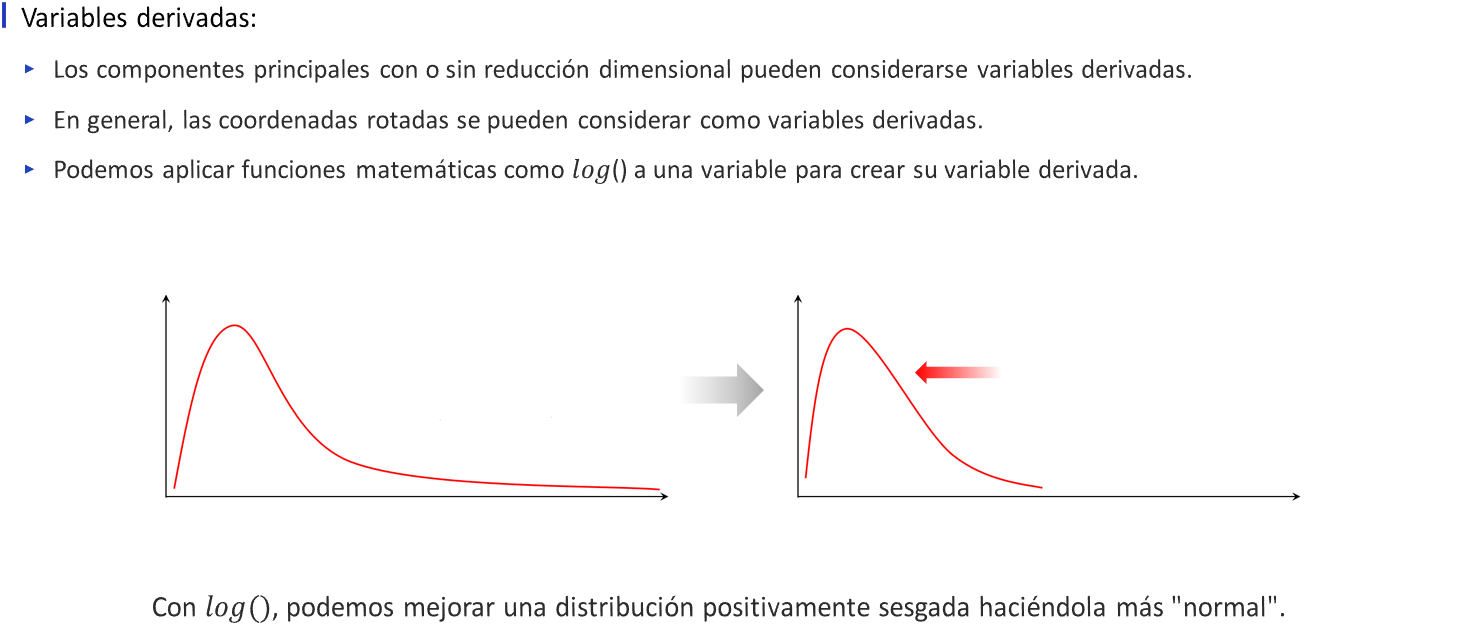

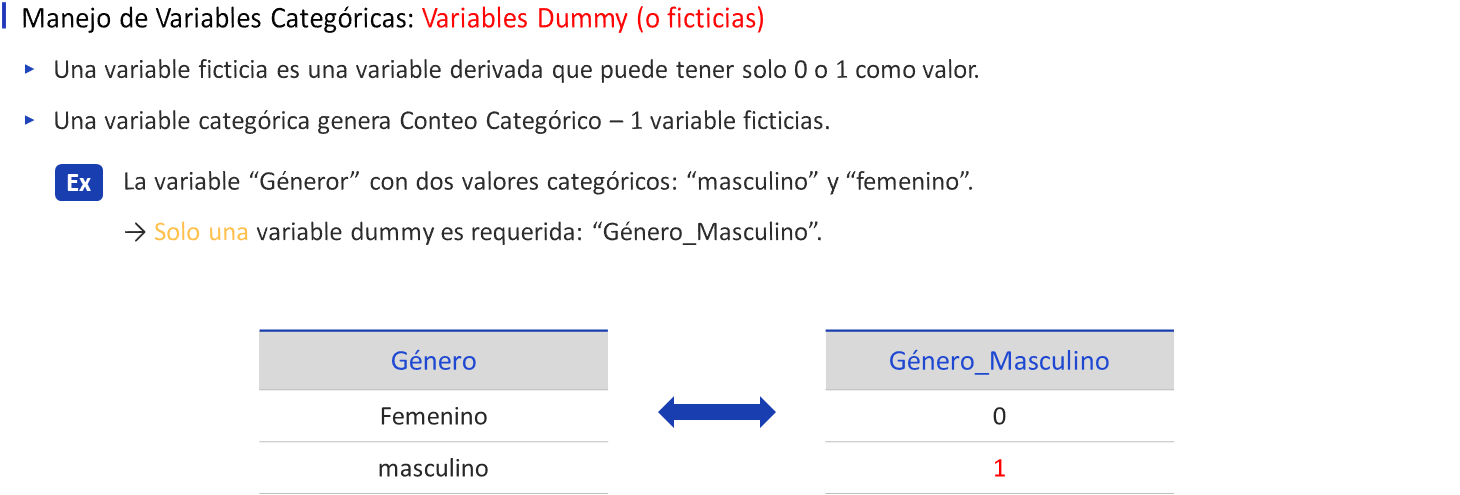

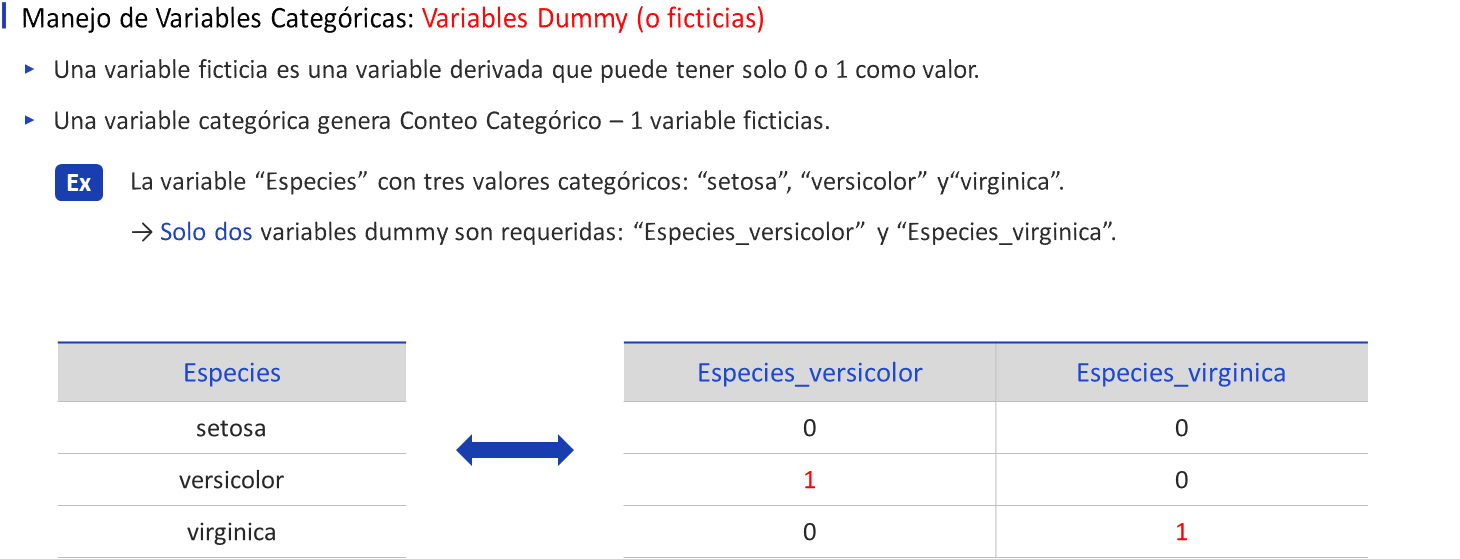

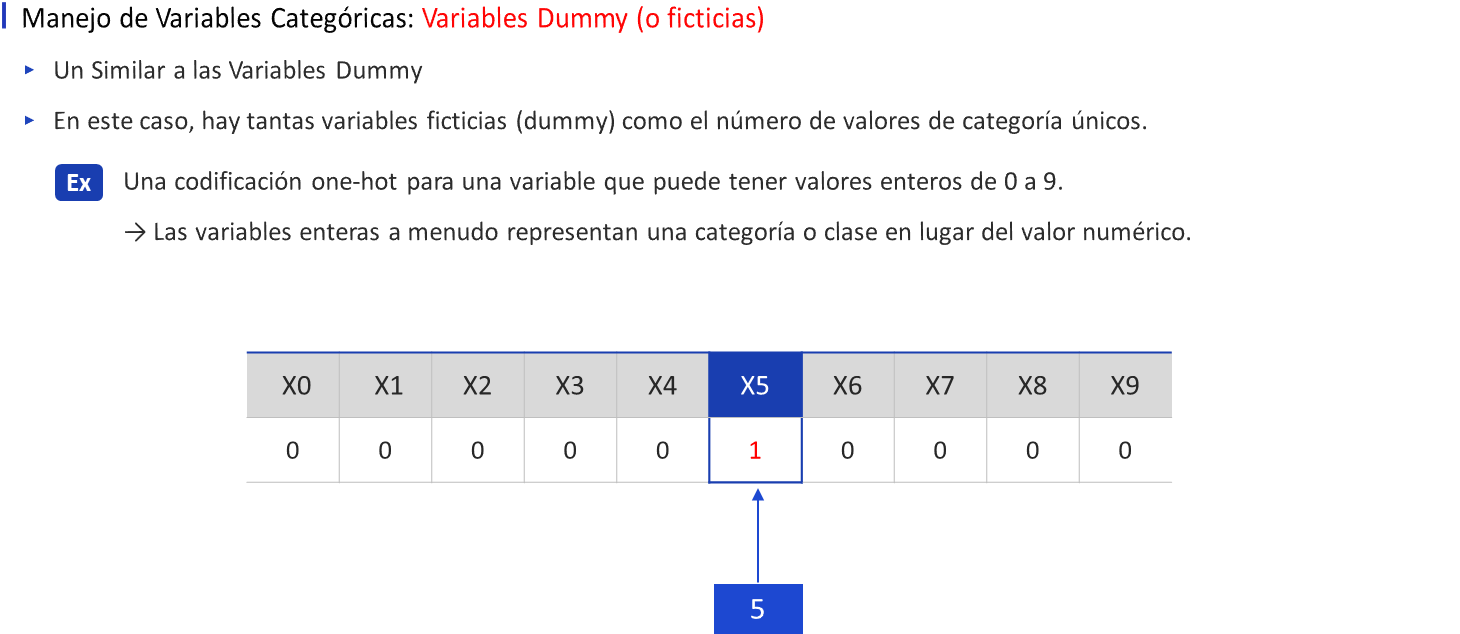

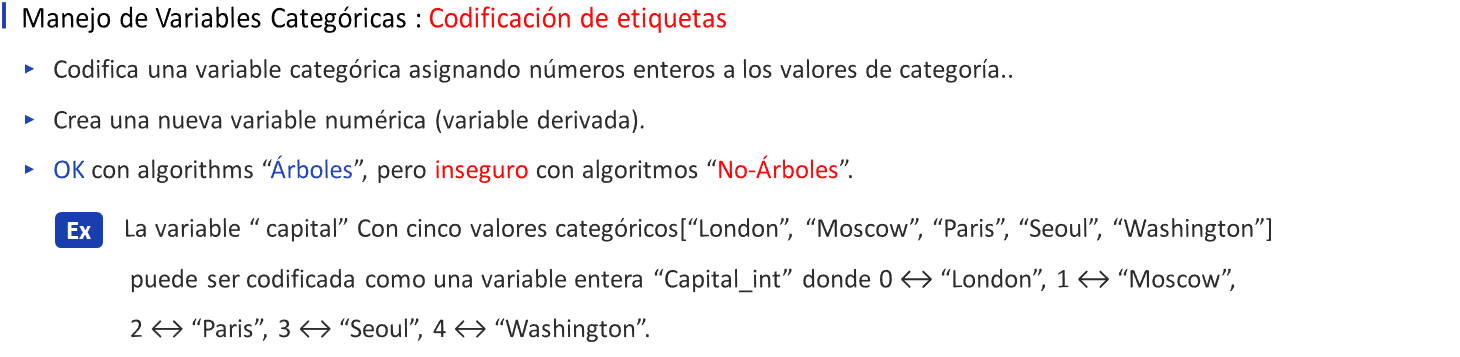

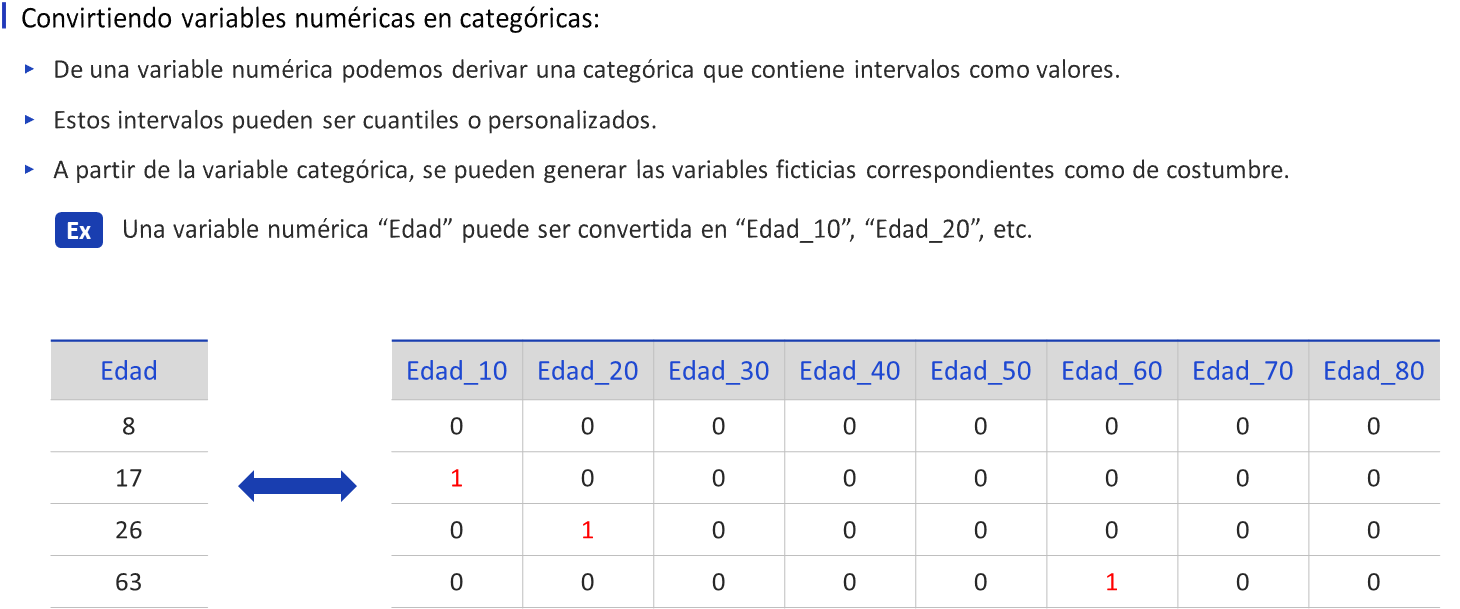

#### Convertir millas por galón en kilómetros por litro (km/L)-

In [1]:
import pandas as pd
import numpy as np

In [6]:
#df = pd.read_csv('./auto-mpg.csv', header=None)
df = pd.read_csv('auto_mpg.csv', sep = ';')
df.colums = ['mpg','cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model_year', 'origin', 'name']

print(df.head(3))
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  




/Users/andresposadacortazar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [7]:
### El comando round (2) redondea hacia arriba el segundo dígito debajo del punto decimal.

mpg_to_kpl = 1-60934 / 3.78541

df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))
print('\n')

df['kpl'] = df['kpl'].round(2)
print(df.head(3))

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   

   origin                       name            kpl  
0       1  chevrolet chevelle malibu -289729.213644  
1       1          buick skylark 320 -241441.011370  
2       1         plymouth satellite -289729.213644  


    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   

   origin                       name        kpl  
0       1  chevrolet chevelle malibu -289729.21  
1       1          buick skylark 320 -241441.01  
2       1         plymouth sat

## Conversión del tipo de datos

In [8]:
### Compruebe el tipo de datos original 
print(df.dtypes)
print('\n')

print(df['horsepower'].unique())
print('\n')

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
kpl             float64
dtype: object


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']




In [9]:
### Convierta el tipo de datos entero en un tipo de datos de caracteres usando el diccionario 

print(df['origin'].unique())
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

print(df['origin'].unique())
print(df['origin'].dtypes)
print('\n')

[1 3 2]
['USA' 'JAPAN' 'EU']
object




In [10]:
### Convierta la cadena en un tipo categórico 

df['origin'] = df['origin'].astype('category')
print(df['origin'].dtypes)

df['origin'] = df['origin'].astype('str')
print(df['origin'].dtypes)

category
object


In [13]:
### Convierta la cadena en un tipo categórico
'''
print(df['model year'].sample(3))
df['model year'] = df['model year']-astype('category')
print(df['model year'].sample(3))
'''

print(df['year'].sample(3))
df['year'] = df['year'].astype('category')
print(df['year'].sample(3))

358    81
376    82
62     72
Name: year, dtype: int64
365    81
152    75
117    73
Name: year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


## Conversión de datos categóricos (División de Secciones)

In [1]:
### Convierta varibles continuas en variables categóricas discretas. 

#df = pd.read_csv('./auto-mpg.csv', header=None)

#df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
#             'acceleration', 'model year', 'origin', 'name']

df = pd.read_csv('auto_mpg.csv', sep = ';')

NameError: name 'pd' is not defined

In [17]:
count, bin_dividers = np.histogram(df['horsepower'], bins= 3)
print(bin_dividers)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [22]:
count, bin_dividers = np.histogram(df['horsepower'], bins= 3)
print(bin_dividers)

[ 46.         107.33333333 168.66666667 230.        ]


In [23]:
bin_names = ['Low output', 'Normal output', 'High output']

df['hp_bin'] = pd.cut(x=df['horsepower'],
                     bins = bin_dividers, 
                     labels = bin_names,
                     include_lowest=True)

print(df[['horsepower', 'hp_bin']].head(15))

    horsepower         hp_bin
0        130.0  Normal output
1        165.0  Normal output
2        150.0  Normal output
3        150.0  Normal output
4        140.0  Normal output
5        198.0    High output
6        220.0    High output
7        215.0    High output
8        225.0    High output
9        190.0    High output
10       170.0    High output
11       160.0  Normal output
12       150.0  Normal output
13       225.0    High output
14        95.0     Low output


## Variable Dummy

In [24]:
"""
Para usar datos categóricos que representan categorías en algoritmos de aprendizaje automatico 
conviértalosen variables ficticias representadas por el número 0 o 1.


df= pd.read.csv('./auto.mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']
"""
df = pd.read_csv('auto_mpg.csv', sep = ';')

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

count, bin_dividers = np.histogram(df['horsepower'], bins= 3)
bin_names = ['Low output', 'Normal output', 'High output']

In [26]:
df['hp_bin'] = pd.cut(x=df['horsepower'],
                     bins=bin_dividers,
                     labels=bin_names,
                     include_lowest=True)

horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    Low output  Normal output  High output
0            0              1            0
1            0              1            0
2            0              1            0
3            0              1            0
4            0              1            0
5            0              0            1
6            0              0            1
7            0              0            1
8            0              0            1
9            0              0            1
10           0              0            1
11           0              1            0
12           0              1            0
13           0              0            1
14           1              0            0


## Normalización

###### Los DataFrames se normalizan para que no se produzca una disminución del rendimiento debido a la diferencia en el tamaño relativo de los datos númericos en la columna (cada variable)

In [27]:
print(df.horsepower.describe())
print('\n')

df.horsepower = df.horsepower / abs(df.horsepower.max())

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [29]:
print(df.horsepower.describe())
print('\n')

min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64


count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


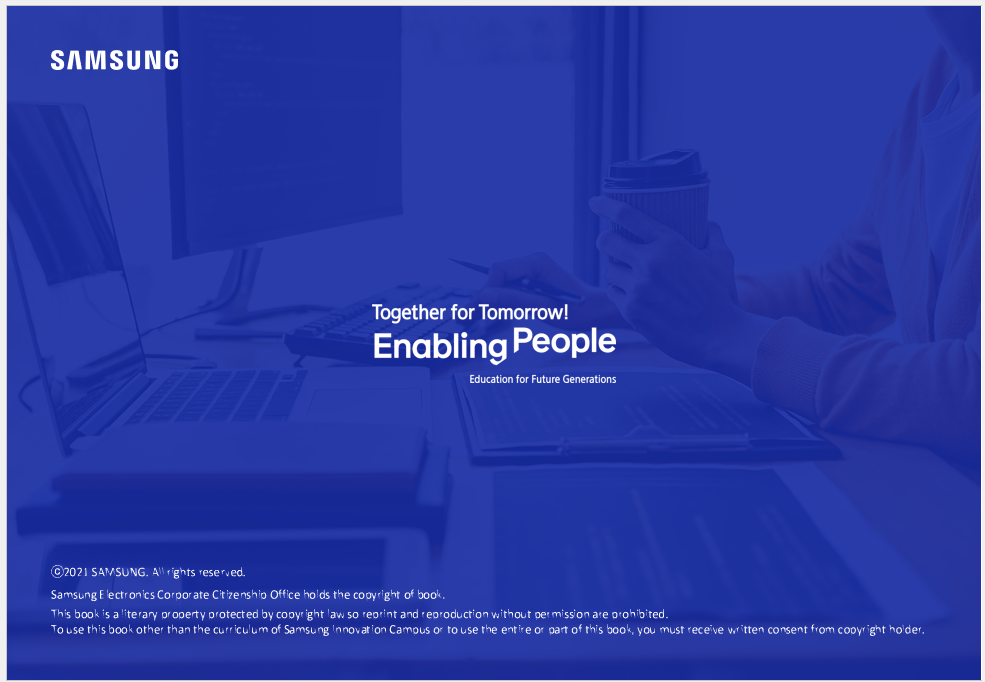

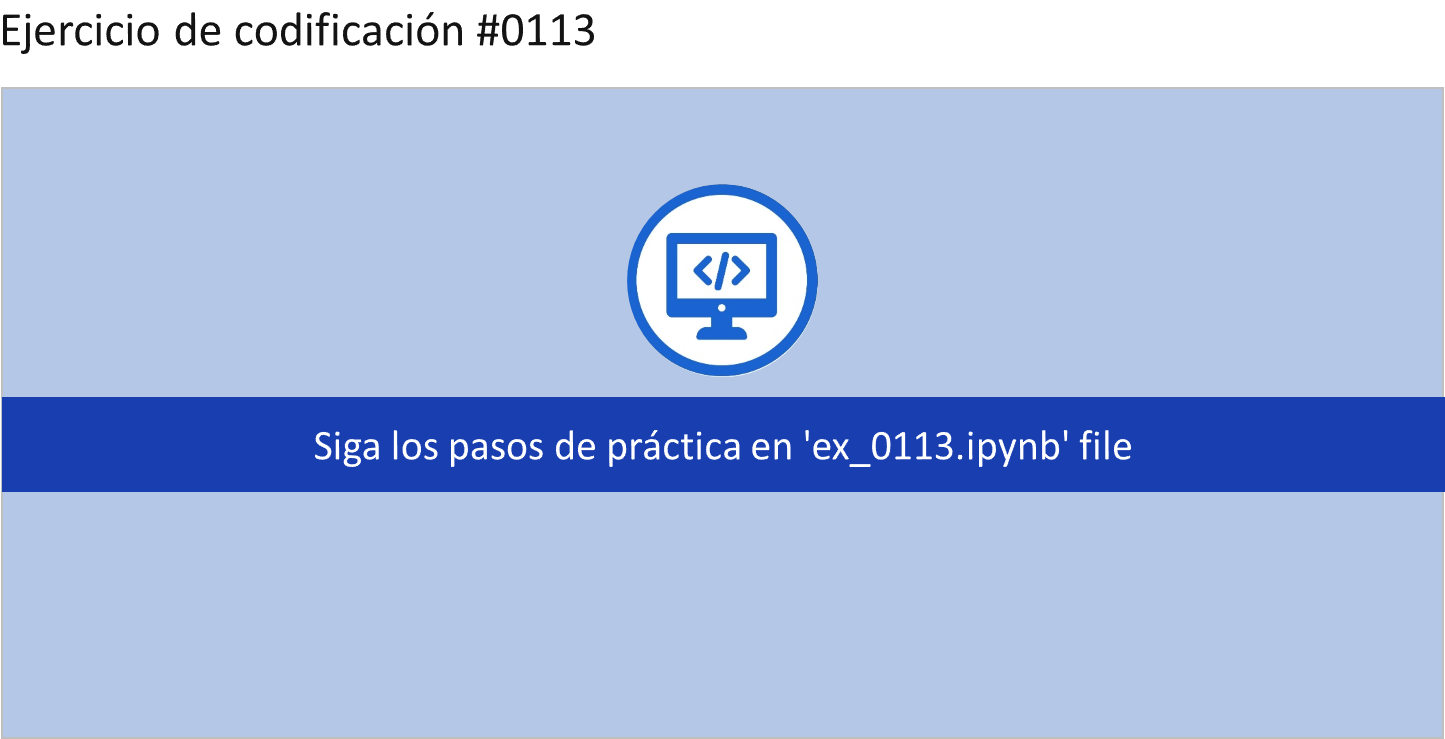

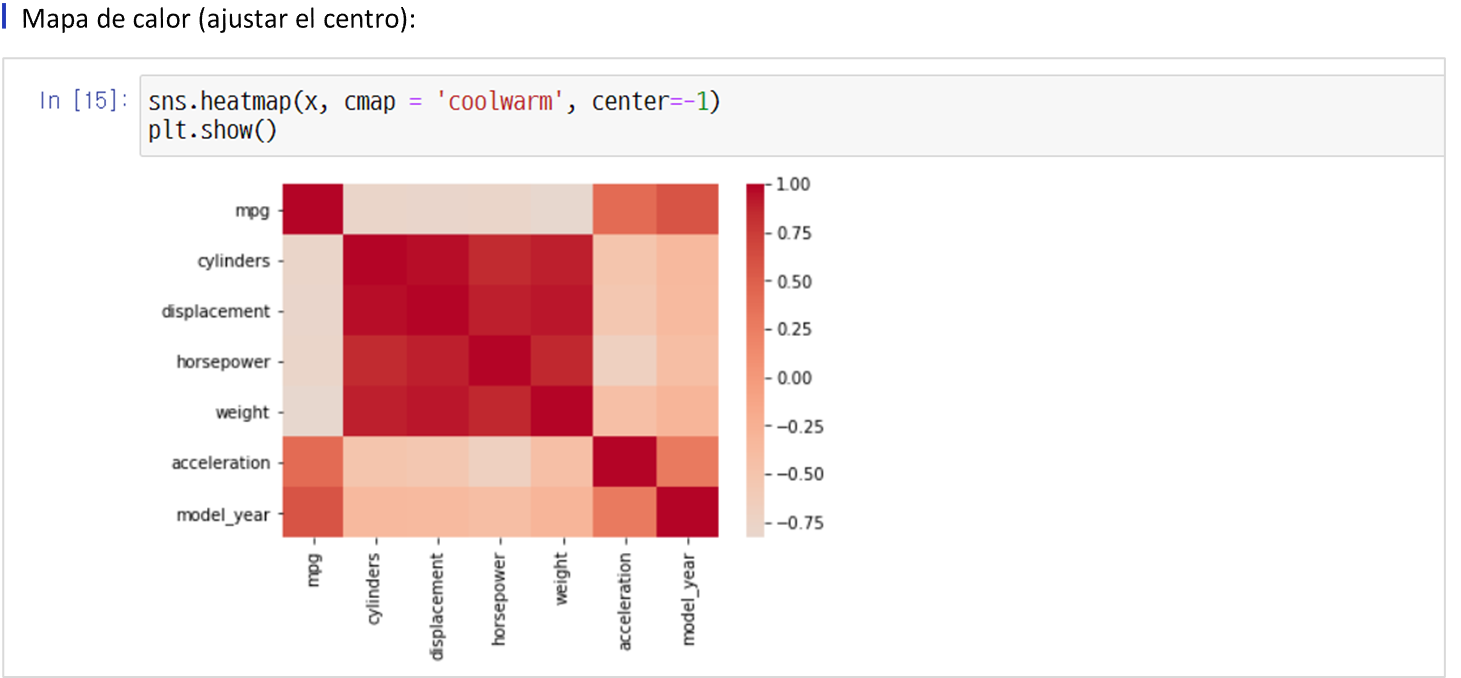

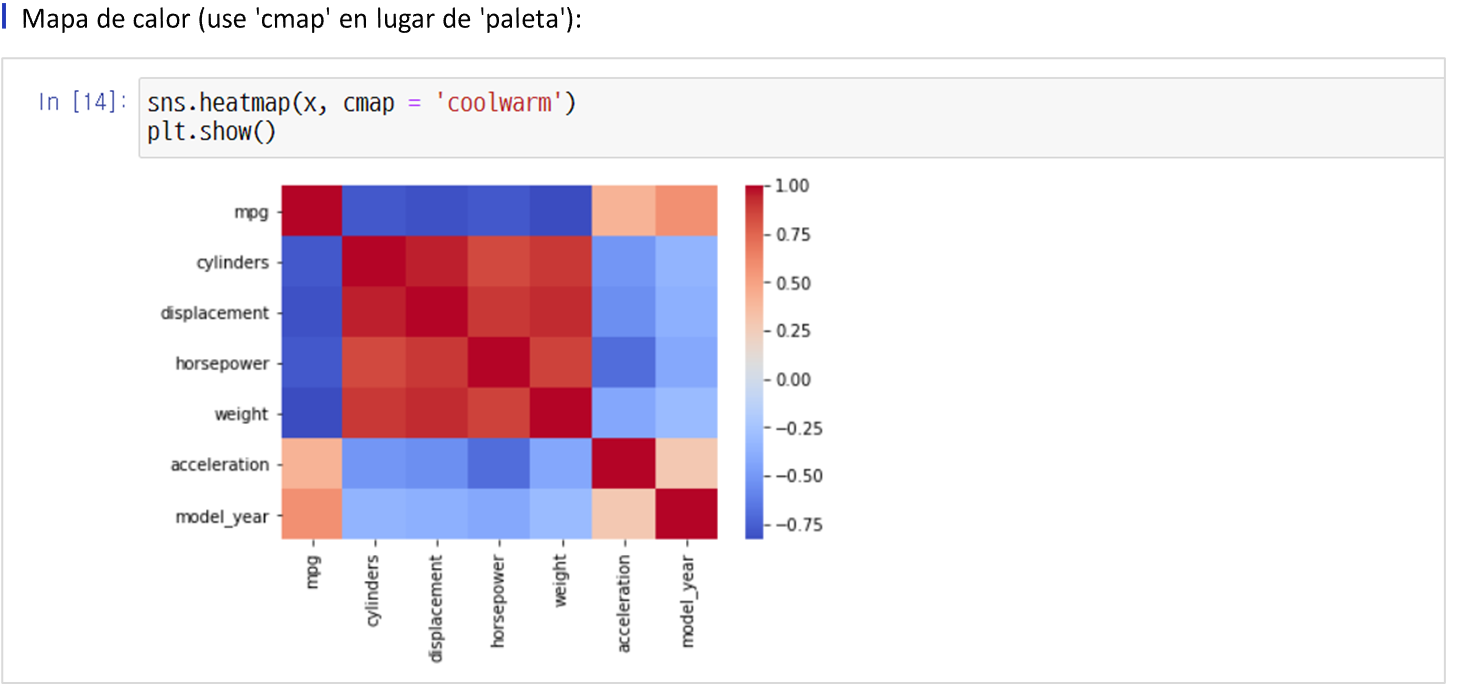

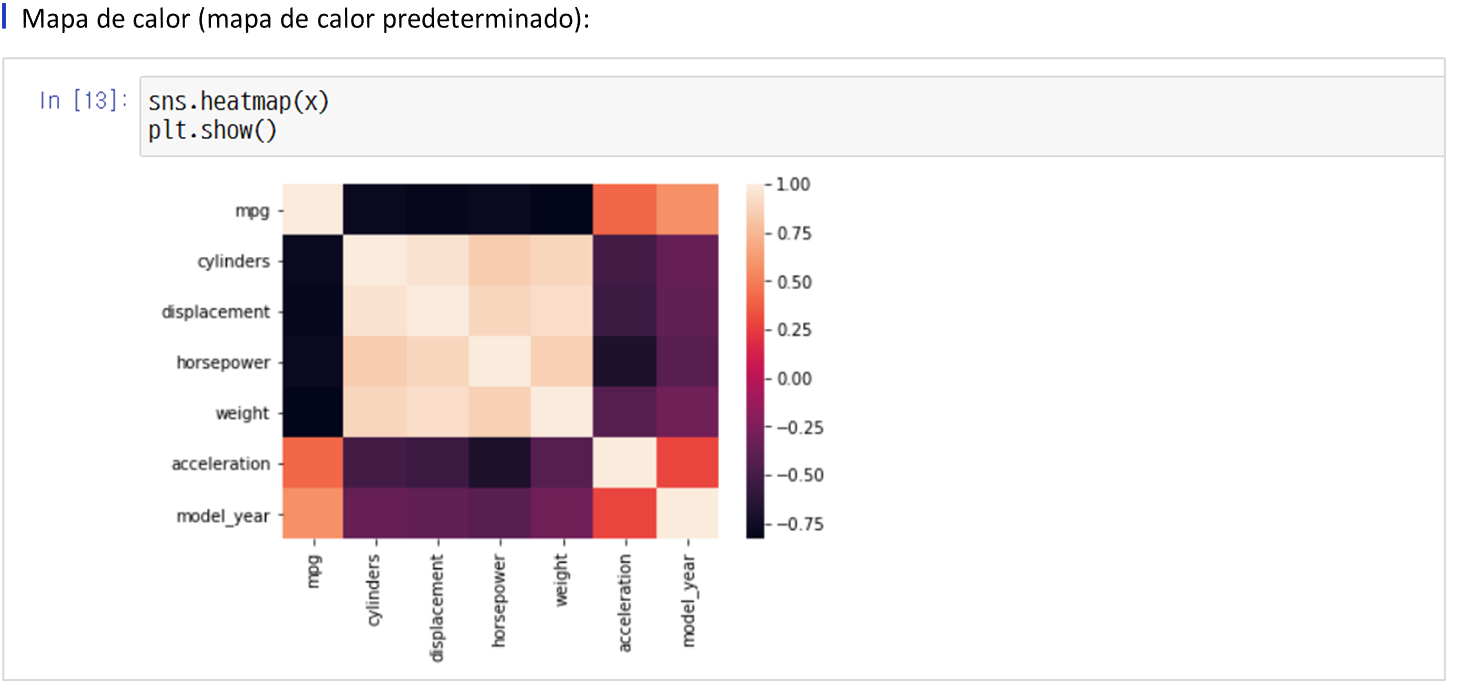

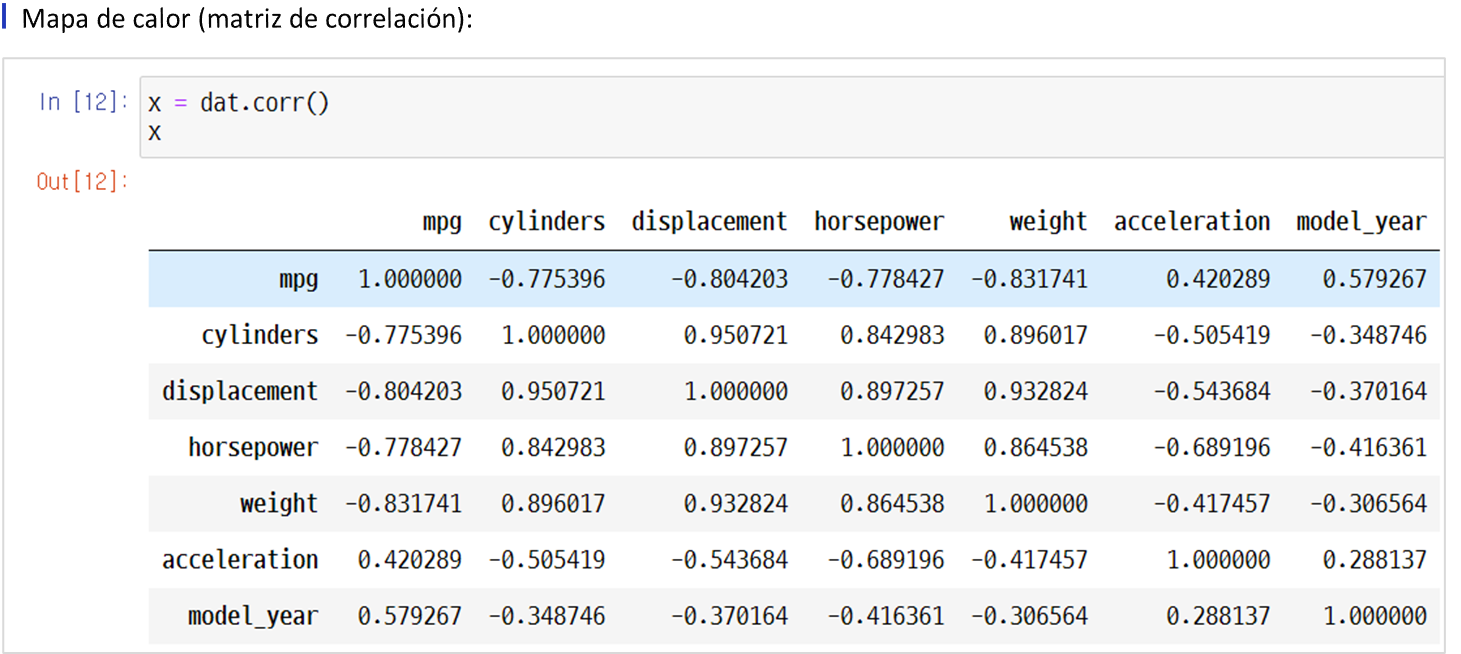

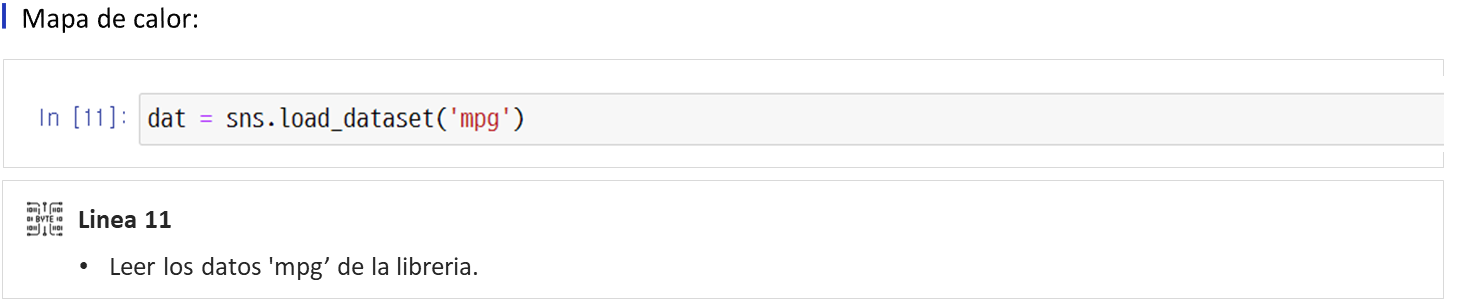

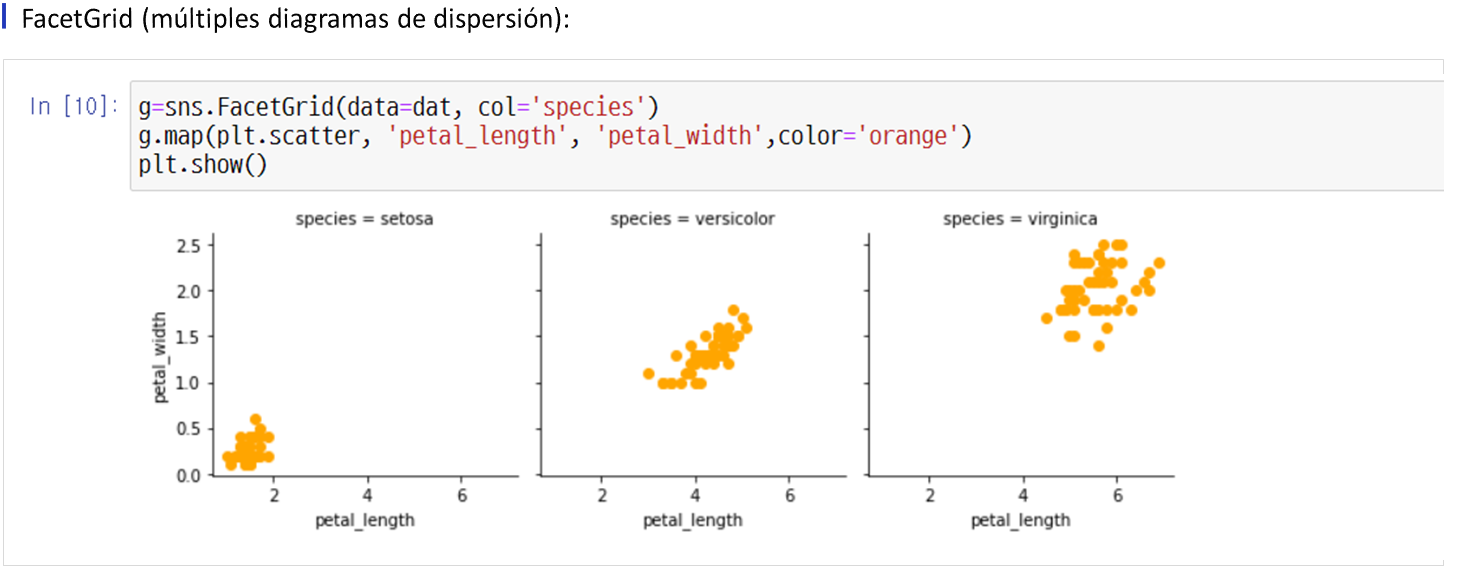

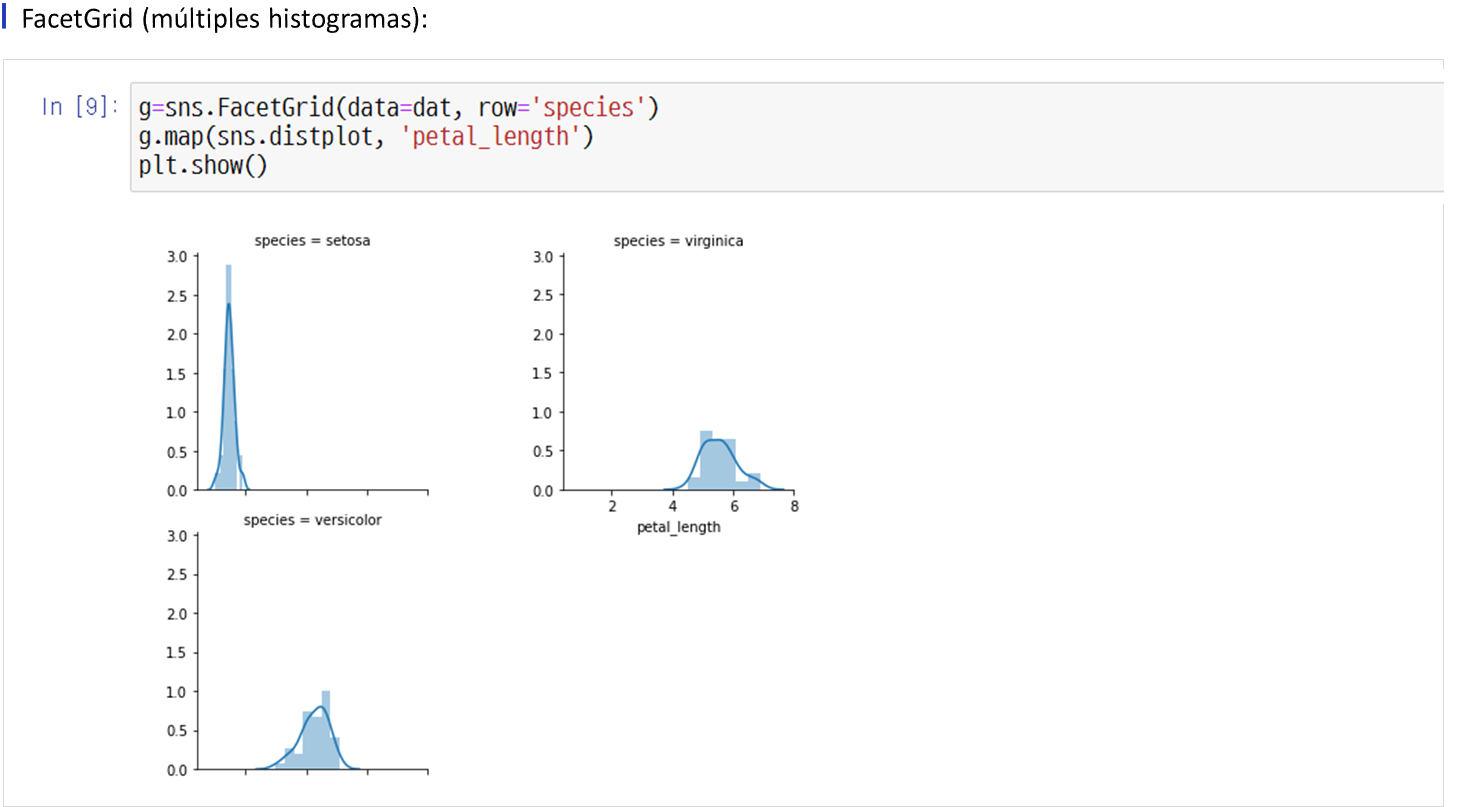

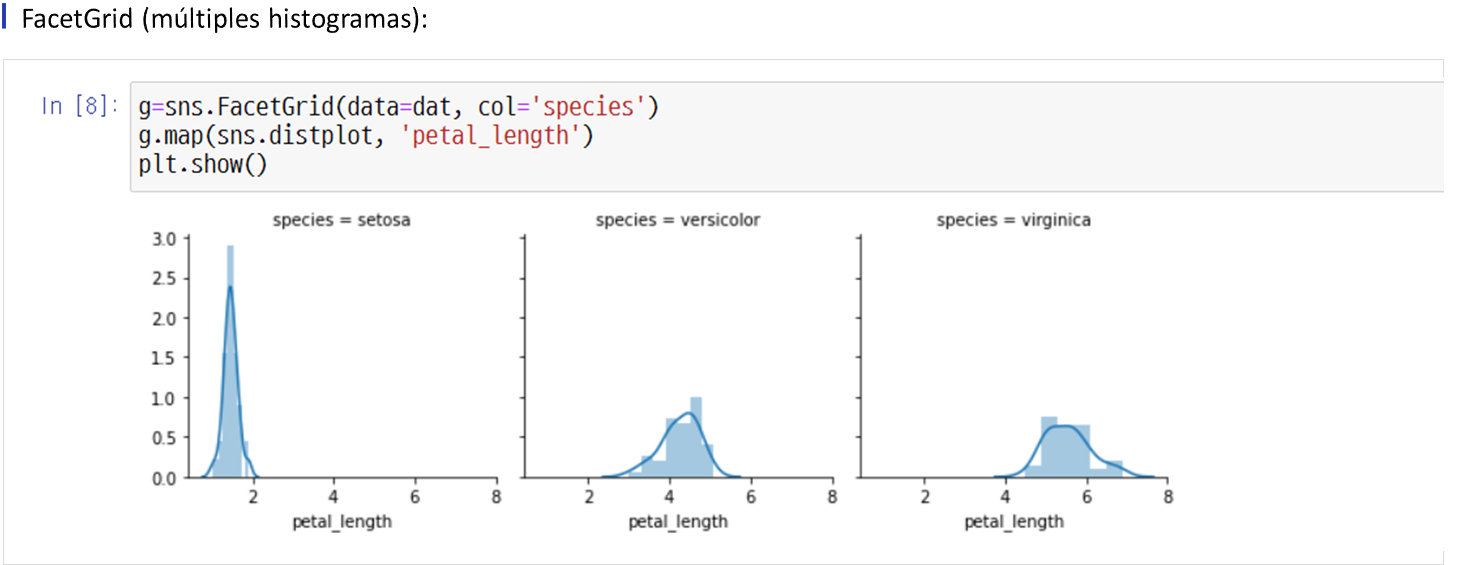